In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [28]:
data = pd.read_csv('polynomial-regression.csv')

In [29]:
data

,araba_fiyat,araba_max_hiz
0,60,180
1,70,180
2,80,200
3,100,200
4,120,200
5,150,220
6,200,240
7,250,240
8,300,300
9,400,350


In [33]:
data.rename(columns={'araba_fiyat':'A','araba_max_hiz':'B'},inplace=True)

In [34]:
data.head()

,A,B
0,60,180
1,70,180
2,80,200
3,100,200
4,120,200


In [35]:
x = data[['A']].values
y = data[['B']].values
print(x)
print(y)

[[  60]
 [  70]
 [  80]
 [ 100]
 [ 120]
 [ 150]
 [ 200]
 [ 250]
 [ 300]
 [ 400]
 [ 500]
 [ 750]
 [1000]
 [2000]
 [3000]]
[[180]
 [180]
 [200]
 [200]
 [200]
 [220]
 [240]
 [240]
 [300]
 [350]
 [350]
 [360]
 [365]
 [365]
 [365]]


In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=100)

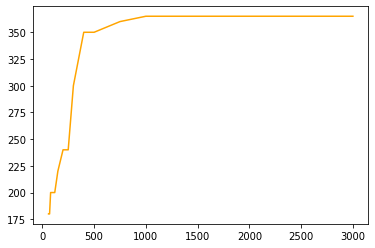

In [37]:
plt.plot(x,y,color='Orange')
plt.show()

In [38]:
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x_train)

In [40]:
x_poly



array([[1.000e+00, 2.000e+03, 4.000e+06],
       [1.000e+00, 2.000e+02, 4.000e+04],
       [1.000e+00, 5.000e+02, 2.500e+05],
       [1.000e+00, 1.500e+02, 2.250e+04],
       [1.000e+00, 8.000e+01, 6.400e+03],
       [1.000e+00, 1.200e+02, 1.440e+04],
       [1.000e+00, 6.000e+01, 3.600e+03],
       [1.000e+00, 7.500e+02, 5.625e+05],
       [1.000e+00, 2.500e+02, 6.250e+04],
       [1.000e+00, 1.000e+02, 1.000e+04],
       [1.000e+00, 3.000e+03, 9.000e+06],
       [1.000e+00, 3.000e+02, 9.000e+04]])

In [41]:
model = LinearRegression()
model.fit(x_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
y_predict = model.predict(poly.fit_transform(x_test))

In [45]:
print(y_predict.sum().mean())
print(y_test.sum().mean())

print("So called Accuracy ", y_predict.sum().mean()/y_test.sum().mean())

856.9566824925278
895.0
So called Accuracy  0.9574934999916511


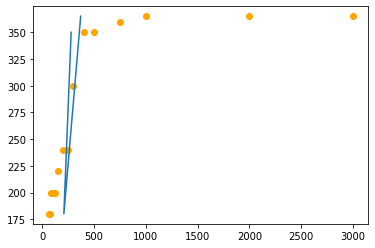

In [46]:
plt.scatter(x,y,color='Orange')
plt.plot(y_predict,y_test)
plt.show()